<a href="https://colab.research.google.com/github/giugliarelligabriele/customer-churn-ml-vs-dl/blob/main/notebooks/customer-churn-ml-vs-dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction: Machine Learning vs Deep Learning

**Author:** Gabriele Giugliarelli
**Objective:** Compare traditional Machine Learning algorithms (Logistic Regression, Random Forest, XGBoost) with a Deep Learning model built in PyTorch to predict customer churn.

**Dataset:** [Telco Customer Churn (Kaggle)](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

---

### Project Overview
The project includes:
1. Data exploration and preprocessing  
2. Model training with classical ML algorithms  
3. Neural network implementation with PyTorch  
4. Evaluation and comparison  
5. Insights and conclusions


In [1]:
#Libraries and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

SEED = 24

np.random.seed(SEED)
random.seed(SEED)


In [2]:
!pip install kagglehub --quiet

import kagglehub

# Download of the Telco Customer Churn dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("✅ Dataset downloaded to:", path)


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
✅ Dataset downloaded to: /kaggle/input/telco-customer-churn


In [3]:
import os

csv_path = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Load dataset
df = pd.read_csv(csv_path)

print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Target distribution
print("\nChurn distribution:")
print(df['Churn'].value_counts(normalize=True).round(3))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# DATA CLEANING AND PREPROCESSING

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert TotalCharges to numeric and fill missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Check target distribution
print("Class distribution in target variable (absolute counts):")
print(y.value_counts())

print("\nClass distribution in target variable (relative):")
print(y.value_counts(normalize=True).round(3))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features


scaler = StandardScaler()
num_features = [col for col in X.columns if X[col].dtype != 'uint8']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

# Summary
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print("✅ Data cleaning and preprocessing completed.")


Class distribution in target variable (absolute counts):
Churn
0    5174
1    1869
Name: count, dtype: int64

Class distribution in target variable (relative):
Churn
0    0.735
1    0.265
Name: proportion, dtype: float64
Training set shape: (5634, 7072)
Test set shape: (1409, 7072)
✅ Data cleaning and preprocessing completed.


✅ Model performance comparison:



,Accuracy,Precision,Recall,F1-score,ROC-AUC
XGBoost,0.8020,0.6610,0.5214,0.5830,0.8441
Random Forest,0.7999,0.6729,0.4786,0.5594,0.8350
Logistic Regression,0.7935,0.6736,0.4305,0.5253,0.8300


<Figure size 800x600 with 0 Axes>

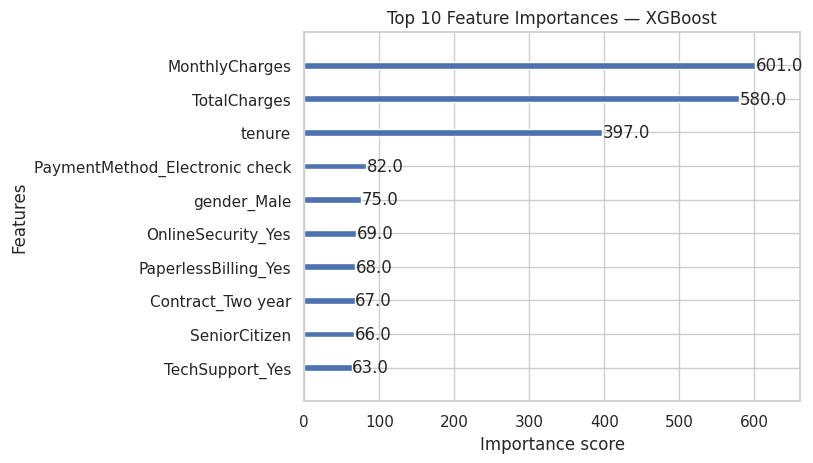

In [6]:
# MACHINE LEARNING MODELS (Logistic Regression, Random Forest, XGBoost)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dictionary to store model performances
results = {}

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=24, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1-score': f1_score(y_test, y_pred_lr),
    'ROC-AUC': roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
}

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=24)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])
}

# XGBoost
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=24
)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-score': f1_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:, 1])
}

# Results summary

results_df = pd.DataFrame(results).T.sort_values(by='ROC-AUC', ascending=False)
print("✅ Model performance comparison:\n")
display(results_df.round(4))

# Most important features
from xgboost import plot_importance

plt.figure(figsize=(8, 6))
plot_importance(xgb, max_num_features=10)
plt.title("Top 10 Feature Importances — XGBoost")
plt.show()


In [7]:
# DEEP LEARNING MODEL
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

torch.manual_seed(SEED)

# Convert training and test sets to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor  = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Neural Network Architecture
class ChurnNet(nn.Module):
    def __init__(self, input_dim):
        super(ChurnNet, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.network(x)

# Initialize model
input_dim = X_train_tensor.shape[1]
model = ChurnNet(input_dim)

# Handle class imbalance
pos_weight_value = y_train.value_counts()[0] / y_train.value_counts()[1]
pos_weight = torch.tensor([pos_weight_value], dtype=torch.float32)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    logits = model(X_test_tensor)
    y_pred_prob = torch.sigmoid(logits).numpy().flatten()
    y_pred_dl = (y_pred_prob > 0.5).astype(int)

# Metrics
dl_results = {
    'Accuracy': accuracy_score(y_test, y_pred_dl),
    'Precision': precision_score(y_test, y_pred_dl, zero_division=0),
    'Recall': recall_score(y_test, y_pred_dl, zero_division=0),
    'F1-score': f1_score(y_test, y_pred_dl, zero_division=0),
    'ROC-AUC': roc_auc_score(y_test, y_pred_prob)
}

print("\n✅ Deep Learning Model (PyTorch) Results:")
for metric, value in dl_results.items():
    print(f"{metric}: {value:.4f}")


Epoch [10/50], Loss: 0.7631
Epoch [20/50], Loss: 0.3838
Epoch [30/50], Loss: 0.1399
Epoch [40/50], Loss: 0.0448
Epoch [50/50], Loss: 0.0211

✅ Deep Learning Model (PyTorch) Results:
Accuracy: 0.7140
Precision: 0.4771
Recall: 0.8075
F1-score: 0.5998
ROC-AUC: 0.8124


✅ Final Model Comparison:



,Accuracy,Precision,Recall,F1-score,ROC-AUC
XGBoost,0.8020,0.6610,0.5214,0.5830,0.8441
Random Forest,0.7999,0.6729,0.4786,0.5594,0.8350
Logistic Regression,0.7935,0.6736,0.4305,0.5253,0.8300
Deep Learning (PyTorch),0.7140,0.4771,0.8075,0.5998,0.8124


<Figure size 800x500 with 0 Axes>

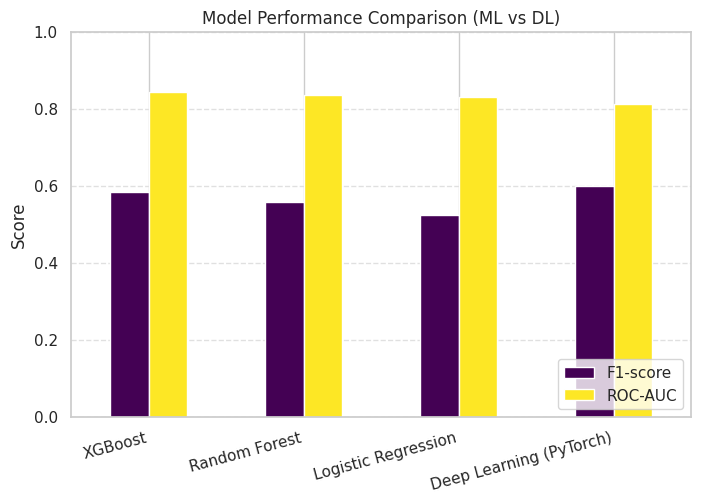

In [8]:
# MODEL COMPARISON AND VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine ML and DL results into one dataframe
final_results = pd.concat([results_df, pd.DataFrame({'Deep Learning (PyTorch)': dl_results}).T])
final_results = final_results.round(4)

print("✅ Final Model Comparison:\n")
display(final_results)

# Bar chart comparison (F1-score and ROC-AUC)
plt.figure(figsize=(8,5))
final_results[['F1-score', 'ROC-AUC']].plot(kind='bar', figsize=(8,5), colormap='viridis')
plt.title("Model Performance Comparison (ML vs DL)")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.show()


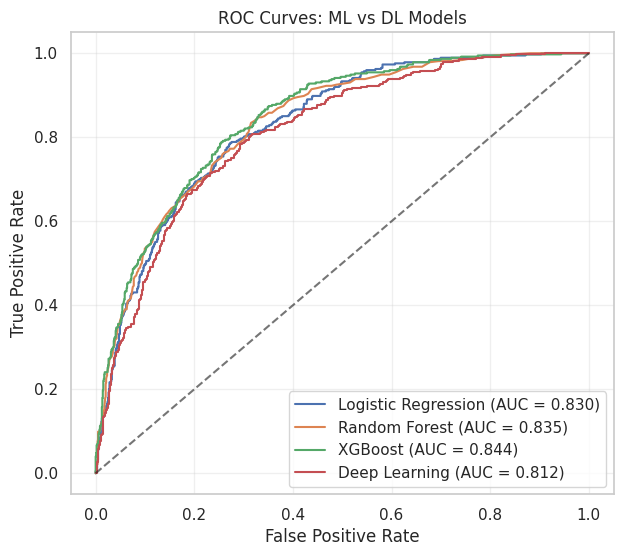

In [9]:
# ROC Curve comparison
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(7,6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:,1]):.3f})")

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1]):.3f})")

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:,1]):.3f})")

# Deep Learning
fpr_dl, tpr_dl, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr_dl, tpr_dl, label=f"Deep Learning (AUC = {roc_auc_score(y_test, y_pred_prob):.3f})")

plt.plot([0,1], [0,1], 'k--', alpha=0.6)
plt.title("ROC Curves: ML vs DL Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


## Key Insights
- Tree-based models (XGBoost, Random Forest) achieved the best overall performance.
- The PyTorch neural network performed comparably but did not outperform ML models, confirming that deep learning is not always optimal for tabular data.
- Proper preprocessing, feature encoding, and class balancing were crucial for consistent results.
